#1

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt 
from matplotlib import style
from sklearn.cluster import KMeans
from sklearn import preprocessing


In [146]:
credit_df = pd.read_csv('Credit_card.csv')
credit_df.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [147]:
credit_df_labels = pd.read_csv('Credit_card_label.csv')
credit_df_labels.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [148]:
credit_df = pd.concat([credit_df, credit_df_labels], axis = 1)
credit_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Ind_ID,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,5008827,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,5009744,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,5009746,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,5009749,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,5009752,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,5028645,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,5023655,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,5115992,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,5118219,0


In [149]:
credit_df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'Ind_ID', 'label'],
      dtype='object')

In [150]:
credit_dummy = pd.get_dummies(credit_df[['Type_Income', 'EDUCATION', 'Housing_type', 'Type_Occupation', 'Marital_status', 'GENDER', 'Car_Owner', 'Propert_Owner']])
credit_dummy

,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,EDUCATION_Academic degree,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,Housing_type_Co-op apartment,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y
0,False,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,False,True,False,True
1,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,True,True,False
2,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,True,True,False
3,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,True,True,False
4,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,True,False,False,True
1544,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,True,False,True,False
1545,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,True,False,True,False,True
1546,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,True,False


In [151]:
credit_df = credit_df.drop(['Type_Income', 'EDUCATION', 'Housing_type', 'Type_Occupation', 'Marital_status', 'GENDER', 'Car_Owner', 'Propert_Owner',], axis = 1)

In [152]:
credit_df = pd.concat([credit_df, credit_dummy], axis=1)
credit_df

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y
0,5008827,0,180000.0,-18772.0,365243,1,0,0,0,2,...,True,False,False,False,False,True,False,True,False,True
1,5009744,0,315000.0,-13557.0,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
2,5009746,0,315000.0,NaN,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
3,5009749,0,NaN,-13557.0,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
4,5009752,0,315000.0,-13557.0,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,NaN,-11957.0,-2182,1,0,0,0,2,...,True,False,False,False,True,False,True,False,False,True
1544,5023655,0,225000.0,-10229.0,-1209,1,0,0,0,1,...,False,False,True,False,True,False,True,False,True,False
1545,5115992,2,180000.0,-13174.0,-2477,1,0,0,0,4,...,True,False,False,False,False,True,False,True,False,True
1546,5118219,0,270000.0,-15292.0,-645,1,1,1,0,2,...,False,False,False,False,False,True,False,True,True,False


In [153]:
credit_df

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y
0,5008827,0,180000.0,-18772.0,365243,1,0,0,0,2,...,True,False,False,False,False,True,False,True,False,True
1,5009744,0,315000.0,-13557.0,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
2,5009746,0,315000.0,NaN,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
3,5009749,0,NaN,-13557.0,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
4,5009752,0,315000.0,-13557.0,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,NaN,-11957.0,-2182,1,0,0,0,2,...,True,False,False,False,True,False,True,False,False,True
1544,5023655,0,225000.0,-10229.0,-1209,1,0,0,0,1,...,False,False,True,False,True,False,True,False,True,False
1545,5115992,2,180000.0,-13174.0,-2477,1,0,0,0,4,...,True,False,False,False,False,True,False,True,False,True
1546,5118219,0,270000.0,-15292.0,-645,1,1,1,0,2,...,False,False,False,False,False,True,False,True,True,False


In [154]:
credit_df['Annual_income'] = credit_df['Annual_income'].fillna(0)

In [155]:
credit_df

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y
0,5008827,0,180000.0,-18772.0,365243,1,0,0,0,2,...,True,False,False,False,False,True,False,True,False,True
1,5009744,0,315000.0,-13557.0,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
2,5009746,0,315000.0,NaN,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
3,5009749,0,0.0,-13557.0,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
4,5009752,0,315000.0,-13557.0,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0.0,-11957.0,-2182,1,0,0,0,2,...,True,False,False,False,True,False,True,False,False,True
1544,5023655,0,225000.0,-10229.0,-1209,1,0,0,0,1,...,False,False,True,False,True,False,True,False,True,False
1545,5115992,2,180000.0,-13174.0,-2477,1,0,0,0,4,...,True,False,False,False,False,True,False,True,False,True
1546,5118219,0,270000.0,-15292.0,-645,1,1,1,0,2,...,False,False,False,False,False,True,False,True,True,False


In [156]:
credit_df.columns

Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'Birthday_count',
       'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'Ind_ID', 'label', 'Type_Income_Commercial associate',
       'Type_Income_Pensioner', 'Type_Income_State servant',
       'Type_Income_Working', 'EDUCATION_Academic degree',
       'EDUCATION_Higher education', 'EDUCATION_Incomplete higher',
       'EDUCATION_Lower secondary', 'EDUCATION_Secondary / secondary special',
       'Housing_type_Co-op apartment', 'Housing_type_House / apartment',
       'Housing_type_Municipal apartment', 'Housing_type_Office apartment',
       'Housing_type_Rented apartment', 'Housing_type_With parents',
       'Type_Occupation_Accountants', 'Type_Occupation_Cleaning staff',
       'Type_Occupation_Cooking staff', 'Type_Occupation_Core staff',
       'Type_Occupation_Drivers', 'Type_Occupation_HR staff',
       'Type_Occupation_High skill tech staff', 'Type_Occupation_IT staff',
       'Type_Occ

#2

In [157]:
credit_corr=credit_df.corr()

These variables I feel will have the highest chance of showing correlation with if they will get approved for a credit card or not, but at the same time univariable linear correlation isn't what is needed here so the data will be skewed

<Axes: >

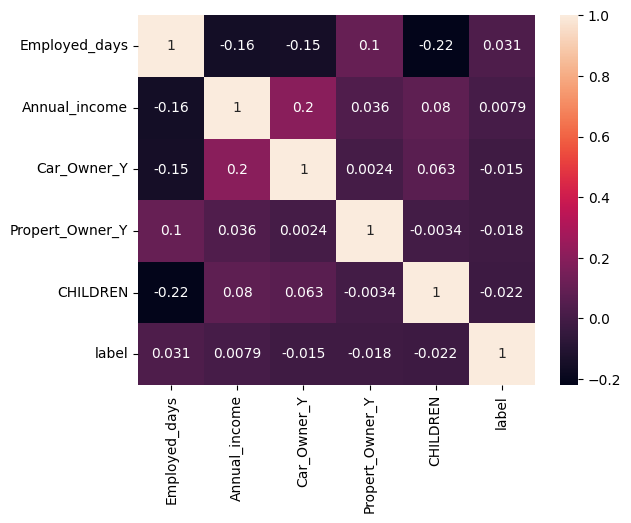

In [158]:
sns.heatmap(credit_df[['Employed_days', 'Annual_income', 'Car_Owner_Y', 'Propert_Owner_Y','CHILDREN', 'label']].corr(),annot=True,)

In [159]:
y = credit_df ['label'] 
X = credit_df [['CHILDREN']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [160]:
y_pred = regression_model.predict(X_test)
y_pred

array([0.12426729, 0.12426729, 0.11304348, 0.12426729, 0.12426729,
       0.11865539, 0.12426729, 0.12426729, 0.12426729, 0.12426729,
       0.11304348, 0.12426729, 0.12426729, 0.12426729, 0.11865539,
       0.12426729, 0.12426729, 0.12426729, 0.12426729, 0.12426729,
       0.12426729, 0.12426729, 0.11865539, 0.12426729, 0.12426729,
       0.12426729, 0.12426729, 0.12426729, 0.11865539, 0.12426729,
       0.12426729, 0.12426729, 0.11865539, 0.12426729, 0.12426729,
       0.12426729, 0.12426729, 0.12426729, 0.12426729, 0.11865539,
       0.11865539, 0.12426729, 0.12426729, 0.12426729, 0.11304348,
       0.11865539, 0.12426729, 0.11865539, 0.12426729, 0.12426729,
       0.12426729, 0.12426729, 0.12426729, 0.12426729, 0.12426729,
       0.11865539, 0.11865539, 0.12426729, 0.12426729, 0.12426729,
       0.12426729, 0.12426729, 0.11304348, 0.12426729, 0.11865539,
       0.11865539, 0.12426729, 0.12426729, 0.12426729, 0.12426729,
       0.11304348, 0.12426729, 0.12426729, 0.12426729, 0.12426

In [161]:
accuracy_score = regression_model.score(X_test, y_test)
print(accuracy_score)

-0.009322627187884569


Simply using one variable and on top of that, using linear regression a very poor way to represent this data as it is simply predicting a yes or no if they are approved which is why the regression is a bad choice and only using one variable will not tell us anything related to the correlation.

#3

In [162]:
credit_df = credit_df.fillna(0)

In [163]:
X = credit_df.drop('label', axis = 1)
y = credit_df [['label']]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=.3, random_state = 22)

In [174]:
sc = StandardScaler()
X_train_2 = sc.fit_transform(X_train_2) 
X_test_2 = sc.fit_transform(X_test_2)

accuracy = {}

for x in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=x) 
    knn.fit(X_train_2, y_train_2) 

    y_pred_2 = knn.predict(X_test_2)
    
    accuracy[x] = knn.score(X_test_2, y_test_2)
print(accuracy)
    

C:\Users\anthony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\anthony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\anthony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

{1: 0.8602150537634409, 2: 0.8924731182795699, 3: 0.875268817204301, 4: 0.8881720430107527, 5: 0.886021505376344, 6: 0.8924731182795699, 7: 0.886021505376344, 8: 0.8924731182795699, 9: 0.8881720430107527, 10: 0.8903225806451613, 11: 0.8903225806451613, 12: 0.8903225806451613, 13: 0.8903225806451613, 14: 0.8903225806451613, 15: 0.8903225806451613, 16: 0.8903225806451613, 17: 0.8903225806451613, 18: 0.8903225806451613, 19: 0.8903225806451613}


so for the test of K, 8 is the best for the value of K

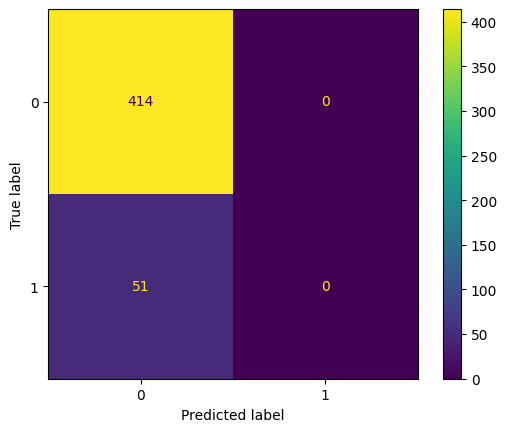

In [166]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

To find the most opitmal value for k, I used a for loop when running the model for KNN to find the best value and this was at 8 which gave us a score of .89. This model performed better as we are working with a finite prediction of whether or not someone will be apporoved, so KNN is a good method for this, but it can assume too much and that is why logistic regression is better.

#4

In [167]:
X = credit_df.drop('label', axis=1)
y = credit_df['label']
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [168]:
regression = LogisticRegression(random_state=2).fit(X_train, y_train)
y_predicted = regression.predict(X_test)

In [169]:
regression.score(X_test, y_test)

0.9075268817204301

In [170]:
regression.coef_

array([[-0.04592351]])

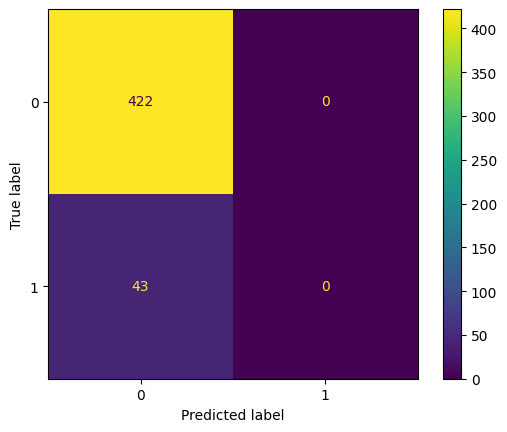

In [171]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)

This performed better than knn because knn assumes right away that the nearest neighbor is going to be the predicted value but with logistic regression there is more of an in depth function to predict if the person will be approved or not.

#5

wasn't sure how to normalize the data from the dataframe, the best measure of performance for the data though is logistic regression as it deals with either a yes or no predicated value and knn can assume too much when it comes to the data, so using logistic regression is the best method.